# 1-Dimensional Convolutional Neural Network

## Data Importation and Train/Test Splitting

In [20]:
from modules import data

records = data.from_json('./data/json/ind.json')
for record in records:
    record.min_quality(90)
    
records_df = data.to_df(records)
labels = records_df['Label']
records_df = data.standard_scaler(records_df.drop('Label', axis=1))
records_df = records_df.sort_index(axis=1)
records_df['Label'] = labels
records_df

Compound,(E)-6-Methoxy-2-(3'-Hydroxybenzylidene)-1-Benzofuran-3(2H)-One,(E)-Stilbene,.Alpha.-Pinene,".Alpha.-Pinene, (-)",.Alpha.-Terpinolene,.Beta.-Pinene,"1,1'-Biphenyl","1,1'-Biphenyl, 2,2',5,5'-Tetramethyl","1,1'-Biphenyl, 2-Ethyl","1,1,3,3-Tetramethyl-1,3-Disilainda",...,"Undecane, 3-Methyl","Undecane, 4,6-Dimethyl","Undecane, 4,8-Dimethyl","Undecane, 4-Methyl","Undecane, 5-Methyl",Urethane,Z-7-Hexadecenoic Acid,"[1,1':3',1''-Terphenyl]-2'-Ol","[1,1':3',1''-Terphenyl]-4'-Ol",Label
Ae LB BS 0h 1,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,-0.263571,-0.088704,Ae LB BS
Ae LB BS 24h 1,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,0.164155,-0.088704,Ae LB BS
Ae LB BS 3h 1,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,-0.263571,-0.088704,Ae LB BS
Ae LB BS 9h 1,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,0.498018,-0.088704,Ae LB BS
Ae LB Ctrl 0h 1,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,-0.263571,-0.088704,Ae LB Ctrl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
An TSB EC 9h 2,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,11.794441,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,4.311867,-0.088704,An TSB EC
An TSB SA 0h 2,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,-0.263571,-0.088704,An TSB SA
An TSB SA 24h 2,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,-0.263571,-0.088704,An TSB SA
An TSB SA 3h 2,-0.062622,-0.062622,-0.10217,-0.062622,-0.062622,-0.123569,-0.121904,-0.086175,-0.062622,-0.062622,...,-0.130545,-0.156232,-0.062622,-0.177363,-0.062622,-0.062622,-0.062622,-0.263571,-0.088704,An TSB SA


In [21]:
from modules import analysis

kruskal_out = analysis.kruskal_test(records_df)
sig_compounds = kruskal_out.index.to_list()
kruskal_out

,Statistic,p-value,Dunn
"Benzenemethanol, .Alpha.-Methyl-,Acetate",110.302698,0.0,True
"Pyrazine, 2,5-Dimethyl",101.783453,0.0,True
"Heptane, 3-Methylene",100.147328,0.0,True
Decane,97.486491,0.0,True
"Benzene, 1,3-Bis(1,1-Dimethylethyl)",95.007484,0.0,True
...,...,...,...
"Pentadecane, 2-Methyl",49.542762,0.018611,True
"Tetradecane, 3-Methyl",49.473655,0.018906,True
4-Cyanocyclohexene,49.375868,0.019332,True
"Cyclotrisiloxane, Hexamethyl",48.566559,0.023204,True


In [22]:
kruskal_out.to_excel('./data/cnn_sigs.xlsx')

In [23]:
from modules import data 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

records = data.from_json('./data/json/ind.json')
for record in records:
    record.min_quality(90)
    record.sig_filter(sig_compounds)
    
records_df = data.to_df(records)
labels = records_df['Label']
records_df = data.standard_scaler(records_df.drop('Label', axis=1))
records_df = records_df.sort_index(axis=1)
records_df['Label'] = labels
records_df['Label'] = label_encoder.fit_transform(records_df['Label'])
records_df.set_index('Label', inplace=True)
records_df

Compound,"1,1'-Biphenyl, 2,2',5,5'-Tetramethyl","1,1-Bis(P-Tolyl)Ethane","1-Hexanol, 2-Ethyl",1-Octanol,1R-.Alpha.-Pinene,"2,4-Dimethyl-1-Heptene",2-Octanone,"2-Propenoic Acid, 2-Ethylhexyl Ester","2-Tert-Butyl-3,4,5,6-Tetrahydropyridine","2H-Pyran, 2-Ethoxy-3,4-Dihydro",...,"Silane, Cyclohexyldimethoxymethyl","Silicic Acid, Diethyl Bis(Trimethylsilyl) Ester","Tetradecane, 3-Methyl",Tetradecanoic Acid,Toluene,"Undecane, 2,6-Dimethyl","Undecane, 2,8-Dimethyl","Undecane, 2-Methyl","Undecane, 3-Methyl","Undecane, 4-Methyl"
Label,,,,,,,,,,,,,,,,,,,,,
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,0.122919,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
1,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,3.675166,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
31,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,3.297268,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
31,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363


In [24]:
from modules import data

records_df = data.bootstrap(records_df)
records_df

Compound,"1,1'-Biphenyl, 2,2',5,5'-Tetramethyl","1,1-Bis(P-Tolyl)Ethane","1-Hexanol, 2-Ethyl",1-Octanol,1R-.Alpha.-Pinene,"2,4-Dimethyl-1-Heptene",2-Octanone,"2-Propenoic Acid, 2-Ethylhexyl Ester","2-Tert-Butyl-3,4,5,6-Tetrahydropyridine","2H-Pyran, 2-Ethoxy-3,4-Dihydro",...,"Silane, Cyclohexyldimethoxymethyl","Silicic Acid, Diethyl Bis(Trimethylsilyl) Ester","Tetradecane, 3-Methyl",Tetradecanoic Acid,Toluene,"Undecane, 2,6-Dimethyl","Undecane, 2,8-Dimethyl","Undecane, 2-Methyl","Undecane, 3-Methyl","Undecane, 4-Methyl"
Label,,,,,,,,,,,,,,,,,,,,,
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,0.122919,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,2.508754,-0.130545,-0.177363
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,0.122919,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
0,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
31,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363
31,-0.086175,-0.097251,-0.416386,-0.108564,-0.193899,-0.261246,-0.098141,-0.10028,-0.101104,-0.108069,...,-0.121716,-0.100609,-0.148655,-0.099293,-0.145645,-0.148954,-0.087897,-0.318946,-0.130545,-0.177363


In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

n_features = len(records_df.columns)
n_classes = len(np.unique(records_df.index))

train_datas, test_datas, train_labels, test_labels = train_test_split(records_df.values, records_df.index, test_size=0.2, random_state=42, stratify=records_df.index)

# train_datas = train_datas.reshape(train_datas.shape[0], n_features, 1)
train_labels = to_categorical(train_labels, n_classes)

# test_datas = test_datas.reshape(test_datas.shape[0], n_features, 1)
test_labels = to_categorical(test_labels, n_classes)

# Model Training and Optimization

## FNN with 1 Sequential Block

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization, Activation

def one_cnn_1d():
    model = Sequential([
        InputLayer(shape=(n_features, 1)),
        
        # Convolutional Block 1
        Conv1D(32, kernel_size=3, dilation_rate=1, padding='same'),
        Conv1D(32, kernel_size=3, dilation_rate=1, padding='same'),
        MaxPool1D(pool_size=2),
        BatchNormalization(),
        Activation('relu'),
        
        Flatten(),
        
        # Fully-connected Layer
        Dense(32, activation='relu'),
        Dropout(rate=0.1),
        Dense(16, activation='relu'),
        Dropout(rate=0.1),
        Dense(n_classes, activation='softmax'),
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
import numpy as np

# earlystop = EarlyStopping(monitor='val_loss', patience=PATIENCE, min_delta=DELTA)
checkpoint = ModelCheckpoint(filepath='./data/cnn/cnn_1.keras', monitor='val_loss', save_best_only=True, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.001, min_lr=0.000001)
kfold = StratifiedKFold(n_splits=5, shuffle=True)


train_loss_history, train_acc_history, val_loss_history, val_acc_history = [], [], [], []
for train_index, val_index in kfold.split(train_datas, np.argmax(train_labels, axis=1)):
  X_train, X_val = train_datas[train_index], train_datas[val_index]
  y_train, y_val = train_labels[train_index], train_labels[val_index]

  cnn_one = one_cnn_1d()
  cnn_one.fit(X_train, y_train, batch_size=4, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint, lr_scheduler])

  train_loss, train_acc = cnn_one.evaluate(X_train, y_train)
  val_loss, val_acc = cnn_one.evaluate(X_val, y_val)

  train_loss_history.append(train_loss)
  train_acc_history.append(train_acc)
  val_loss_history.append(val_loss)
  val_acc_history.append(val_acc)

Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.1179 - loss: 3.1829 - val_accuracy: 0.4951 - val_loss: 2.2217 - learning_rate: 0.0010
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3898 - loss: 2.1654 - val_accuracy: 0.6024 - val_loss: 1.5938 - learning_rate: 0.0010
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4961 - loss: 1.7509 - val_accuracy: 0.6756 - val_loss: 1.2742 - learning_rate: 0.0010
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5895 - loss: 1.4755 - val_accuracy: 0.7854 - val_loss: 1.0430 - learning_rate: 0.0010
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6244 - loss: 1.2601 - val_accuracy: 0.7805 - val_loss: 0.9303 - learning_rate: 0.0010
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6627 - loss: 1.1408 - val_accuracy: 0.8195 - val_loss: 0.8516 - learning_rate: 0.0010
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6698 - loss: 1

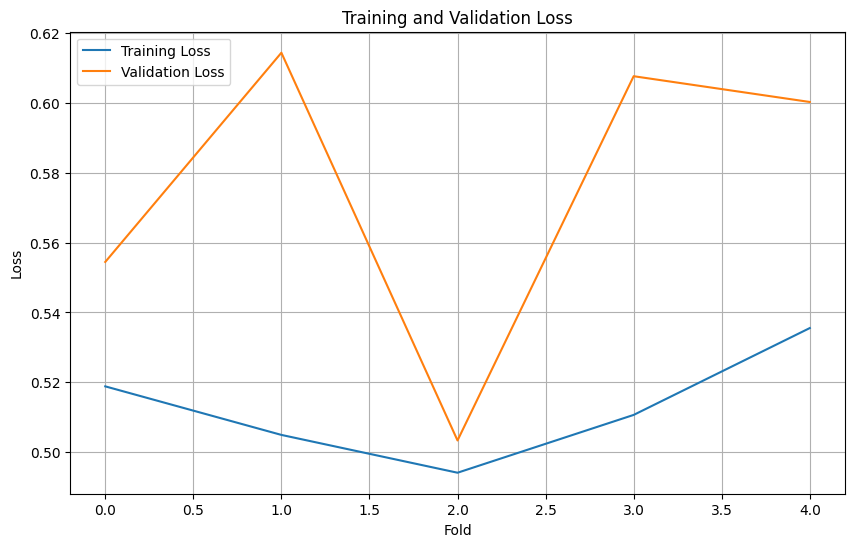

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# Model Testing and Feature Interpretation

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


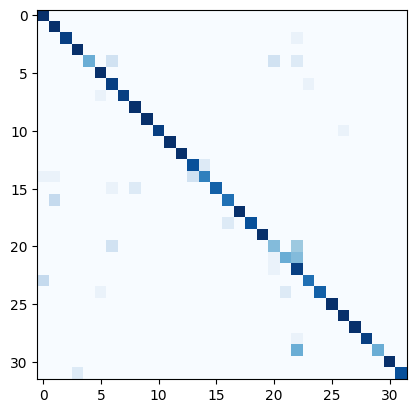

In [29]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

best_model = load_model('./data/cnn/cnn_1.keras')
model_prediction = np.argmax(best_model.predict(test_datas), axis=1)
true_labels = np.argmax(test_labels, axis=1)

cfm = confusion_matrix(true_labels, model_prediction)

plt.imshow(cfm, cmap='Blues')

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ffn_acc = accuracy_score(true_labels, model_prediction)
ffn_pre = precision_score(true_labels, model_prediction, average='micro')
ffn_rec = recall_score(true_labels, model_prediction, average='micro')
ffn_f1 = f1_score(true_labels, model_prediction, average='micro')

print(f'Acc:{ffn_acc}; Prec:{ffn_pre}; Rec:{ffn_rec}; F1:{ffn_f1}')

Acc:0.875; Prec:0.875; Rec:0.875; F1:0.875


In [31]:
import shap
import numpy as np

sample_data = shap.sample(test_datas, 10)
explainer = shap.KernelExplainer(best_model, sample_data)
shap_values = explainer(sample_data)


100%|██████████| 10/10 [02:01<00:00, 12.11s/it]


In [32]:
import pandas as pd

avg_shap = np.mean(np.array(shap_values.values), axis=0)
shap_df = pd.DataFrame(avg_shap)
shap_df.index = records_df.columns
shap_df.columns = label_encoder.inverse_transform(shap_df.columns)
shap_df.to_csv('./data/cnn/shap.csv')

filter_shap = shap_df[~(shap_df == 0).all(axis=1)]
filter_shap

,Ae LB BS,Ae LB Ctrl,Ae LB EC,Ae LB SA,Ae MSA BS,Ae MSA Ctrl,Ae MSA EC,Ae MSA SA,Ae TSA BS,Ae TSA Ctrl,...,An MSA EC,An MSA SA,An TSA BS,An TSA Ctrl,An TSA EC,An TSA SA,An TSB BS,An TSB Ctrl,An TSB EC,An TSB SA
Compound,,,,,,,,,,,,,,,,,,,,,
"1-Hexanol, 2-Ethyl",8.801030e-06,0.000475,0.000048,0.000003,-0.000264,-0.000286,-0.000103,-0.000165,-0.000424,-0.000903,...,-0.000069,3.082440e-04,-0.000634,0.000034,2.096539e-05,0.000486,0.000124,-0.000147,0.000536,0.000052
1-Octanol,1.682898e-05,-0.000728,-0.000004,0.000078,-0.000093,-0.000283,0.000173,0.000143,0.000231,0.000276,...,0.000086,-2.208998e-04,-0.000245,-0.000073,-8.031598e-05,-0.000011,-0.000178,-0.000080,0.000149,0.000186
"2,4-Dimethyl-1-Heptene",-9.541098e-05,0.000041,-0.000523,-0.000049,0.000257,0.000065,-0.000281,0.000076,0.000371,0.000307,...,-0.000123,-6.723583e-04,0.000478,0.000187,3.463562e-05,0.000091,0.000104,-0.000005,-0.000298,0.000047
4-Cyanocyclohexene,1.641537e-05,0.000091,-0.000076,0.000044,-0.000449,0.000454,0.000175,-0.000078,-0.000444,-0.000534,...,0.000090,-2.115470e-04,0.000032,-0.000186,5.881569e-07,-0.000424,0.000064,0.000053,0.000495,0.000116
"5-Dodecene, (E)",-1.156924e-04,-0.000579,0.000135,0.000094,-0.000033,0.000221,0.000026,0.000027,-0.000033,0.000214,...,0.000037,1.717092e-04,-0.000014,-0.000043,9.384943e-05,-0.000007,-0.000020,0.000080,-0.000217,-0.000212
Acetophenone,3.609920e-04,0.000016,-0.000110,-0.000134,0.000130,0.000725,-0.000226,-0.000023,-0.001148,0.000337,...,0.000021,-1.307924e-04,-0.001372,-0.000084,2.354206e-04,0.000820,-0.000019,0.000005,0.000219,-0.000210
"Benzaldehyde, 3,5-Dimethyl",-5.487031e-05,-0.000236,-0.000269,-0.000194,-0.000576,0.000147,0.000363,0.000093,-0.000992,-0.000091,...,0.000119,-2.837941e-04,-0.000426,0.000106,5.561871e-05,-0.000078,-0.000068,0.000026,0.000193,0.000193
"Benzene, 1,3-Bis(1,1-Dimethylethyl)",-6.841199e-05,-0.000324,-0.000155,0.000256,-0.000314,0.000074,-0.000437,-0.000041,-0.000091,-0.000151,...,-0.000175,1.872535e-04,-0.000249,0.000067,7.745898e-05,0.000430,0.000164,-0.000065,0.000168,0.000069
"Benzenemethanol, .Alpha.-Methyl-,Acetate",3.102241e-04,0.000604,0.000592,0.000006,0.000016,-0.000105,-0.000113,0.000071,0.000801,0.000499,...,-0.000382,-3.783305e-04,0.000176,0.000022,-5.492404e-05,-0.000535,-0.000024,0.000027,0.000106,0.000282


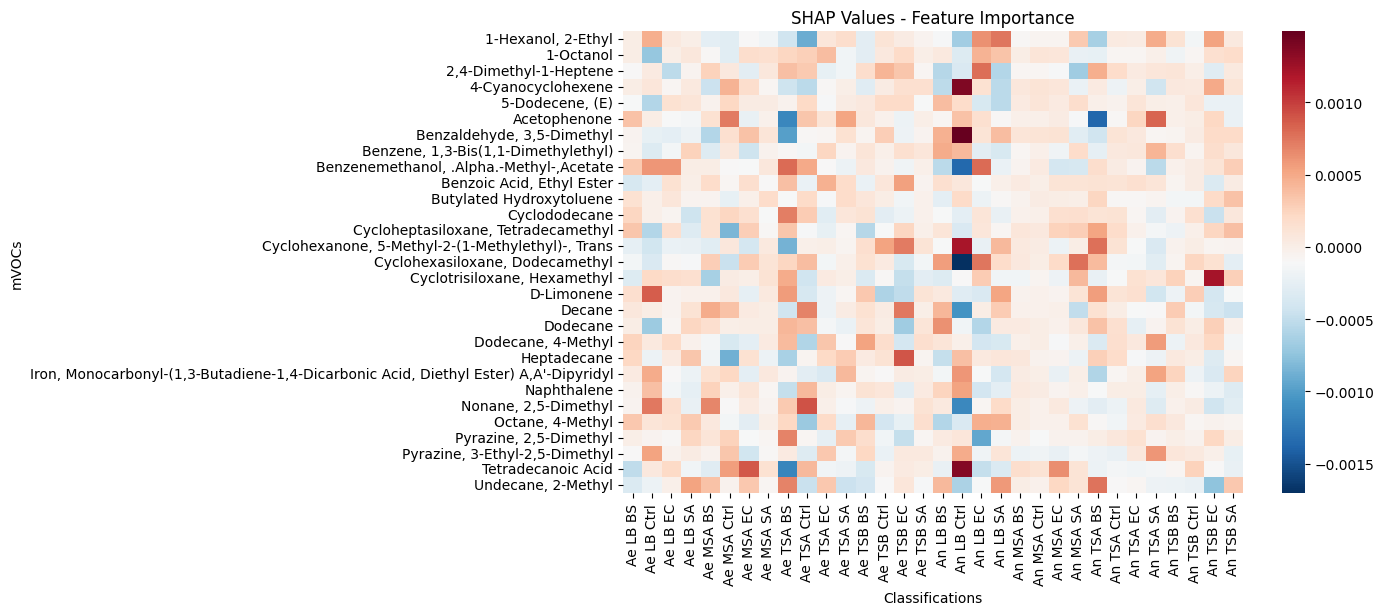

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filter_shap, cmap='RdBu_r')
plt.xlabel('Classifications')
plt.ylabel('mVOCs')
plt.title('SHAP Values - Feature Importance')
plt.savefig('./data/figures/CNN-SHAP.png', dpi=300, bbox_inches='tight')
plt.show()